In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [126]:
wo_1_1_0 = pd.read_csv("data/csv/still/0/wo_1_1_0.csv")
# wo_1_1_0 = pd.read_csv("data/csv/still_with_receiver/0/w_1_1_0.csv")

wo_1_1_0.head()

,timestamps,csi_len,channel,err_info,noise_floor,rate,bandWidth,num_tones,nr,nc,...,payload_length,block_length,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,with_receiver,coord1,coord2
0,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,1,27.459060,92.070625,0.992894,-1.418147,0,1,1
1,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,2,27.459060,167.839209,-0.992894,1.994465,0,1,1
2,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,3,28.844410,94.339811,0.982794,-1.485895,0,1,1
3,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,4,29.154759,174.642492,-1.030377,1.983207,0,1,1
4,429192390,560,2437,0,0,140,0,56,2,2,...,1320,1904,5,30.805844,89.453899,0.946773,-1.470015,0,1,1


In [127]:
def hampel_filter(input_series, window_size=5, n_sigmas=3):
    """
    Apply Hampel filter to detect and replace outliers with the median of neighboring values.
    
    Parameters:
    - input_series: A Pandas Series of data points (e.g., amplitude values).
    - window_size: The number of adjacent data points to consider on each side (2*window_size+1 total window).
    - n_sigmas: The number of standard deviations beyond which a point is considered an outlier.
    
    Returns:
    - A Pandas Series with outliers replaced by the rolling median.
    """
    
    # Convert input to pandas series if not already
    input_series = pd.Series(input_series)
    
    # Calculate the rolling median and rolling standard deviation
    rolling_median = input_series.rolling(window=window_size, center=True).median()
    rolling_std = input_series.rolling(window=window_size, center=True).std()

    # Calculate the absolute difference between the points and the rolling median
    diff = np.abs(input_series - rolling_median)
    
    # Identify outliers based on the threshold (n_sigmas)
    outliers = diff > (n_sigmas * rolling_std)
    
    # Replace outliers with the median
    filtered_series = input_series.copy()
    filtered_series[outliers] = rolling_median[outliers]

    return filtered_series

In [128]:
def apply_savgol_filter(input_array, window_length=11, polyorder=3):
    # Input array is expected to be 2D: rows are sets, columns are subcarriers
    smoothed_array = np.empty_like(input_array)
    
    # Apply Savitzky-Golay filter for each subcarrier (column-wise)
    for i in range(input_array.shape[1]):  # Loop over subcarriers (columns)
        smoothed_array[:, i] = savgol_filter(input_array[:, i], window_length=window_length, polyorder=polyorder)
    
    return smoothed_array

# NC1

In [129]:
wo_1_1_0_nc_1 = wo_1_1_0[wo_1_1_0['nc'] == 1]
wo_1_1_0_nc_1.head()

,timestamps,csi_len,channel,err_info,noise_floor,rate,bandWidth,num_tones,nr,nc,...,payload_length,block_length,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,with_receiver,coord1,coord2
112,429193757,280,2437,0,0,133,0,56,2,1,...,1320,1624,1,223.020178,250.936247,-0.013452,-2.783288,0,1,1
113,429193757,280,2437,0,0,133,0,56,2,1,...,1320,1624,2,212.275764,253.938969,-0.146561,-2.890883,0,1,1
114,429193757,280,2437,0,0,133,0,56,2,1,...,1320,1624,3,207.624661,272.016544,-0.233297,-2.949244,0,1,1
115,429193757,280,2437,0,0,133,0,56,2,1,...,1320,1624,4,202.141040,275.960142,-0.348348,-3.058150,0,1,1
116,429193757,280,2437,0,0,133,0,56,2,1,...,1320,1624,5,191.426226,259.113875,-0.477665,3.048836,0,1,1


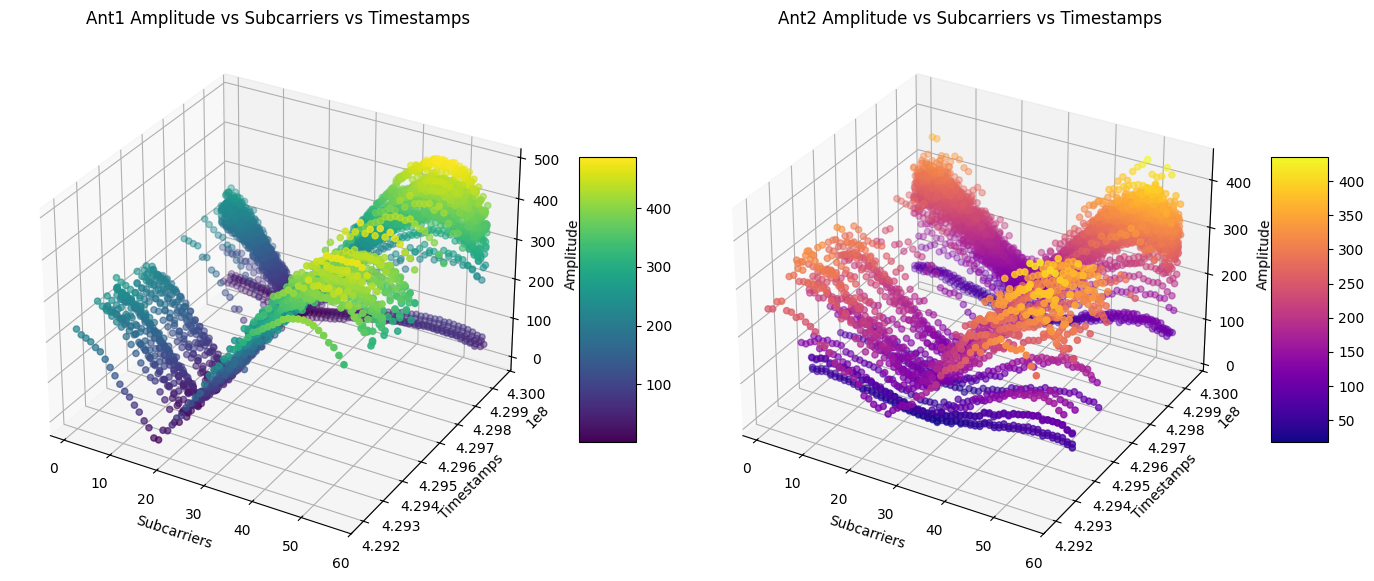

In [130]:
# Create a figure with two subplots for side-by-side 3D scatter plots
fig = plt.figure(figsize=(14, 6))

# First subplot for Ant1 Amplitude
ax1 = fig.add_subplot(121, projection='3d')
subcarriers = wo_1_1_0_nc_1["subcarriers"]
amplitude_ant1 = wo_1_1_0_nc_1["ant1_amplitude"]
timestamps = wo_1_1_0_nc_1["timestamps"]

# 3D scatter plot for Ant1
# scatter1 = ax1.scatter(subcarriers, timestamps, amplitude_ant1, c=amplitude_ant1, cmap='viridis')
scatter1 = ax1.scatter(subcarriers, timestamps, amplitude_ant1, c=amplitude_ant1, cmap='viridis')
ax1.set_xlabel('Subcarriers')
ax1.set_ylabel('Timestamps')
ax1.set_zlabel('Amplitude')
ax1.set_title('Ant1 Amplitude vs Subcarriers vs Timestamps')
fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=5)

# Second subplot for Ant2 Amplitude
ax2 = fig.add_subplot(122, projection='3d')
amplitude_ant2 = wo_1_1_0_nc_1["ant2_amplitude"]

# 3D scatter plot for Ant2
scatter2 = ax2.scatter(subcarriers, timestamps, amplitude_ant2, c=amplitude_ant2, cmap='plasma')
ax2.set_xlabel('Subcarriers')
ax2.set_ylabel('Timestamps')
ax2.set_zlabel('Amplitude')
ax2.set_title('Ant2 Amplitude vs Subcarriers vs Timestamps')
fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [184]:
wo_1_1_0_nc_1_ant1 = wo_1_1_0_nc_1[['subcarriers', 'ant1_amplitude']]


In [273]:
# grouped = wo_1_1_0_nc_1_ant1.groupby('subcarriers')['ant1_amplitude'].apply(list)
# filtered_data = grouped.apply(lambda x: hampel_filter(x, window_size=560, n_sigmas=0.1))

In [274]:
# filtered_data_1d = []

# for j in range(filtered_data.shape[1]):
#     for i in range(1, filtered_data.shape[0]+1):
#         filtered_data_1d.append(filtered_data[j][i])
        
# print(filtered_data_1d)

[223.02017845926, 212.275764042907, 207.624661348309, 202.14103987068, 191.426225998425, 184.491192201688, 169.62311163282, 152.898659248536, 135.793961574144, 118.342722632192, 104.403065089105, 93.5360892917809, 76.8960337078578, 63.2455532033676, 45.1220566907139, 31.4006369362152, 9.21954445729289, 8.24621125123532, 36.3593179253957, 38.8973006775534, 57.2712842531054, 78.1600921186765, 87.9204185613331, 111.233987611701, 126.178445068879, 144.253249530123, 157.622967869534, 183.439363278441, 208.580919549224, 226.490617907233, 239.006276068224, 259.453271322603, 269.712810225988, 289.110705439975, 298.7390165345, 313.695712434837, 328.823660949148, 344.337044187813, 350.416894569882, 359.92360300486, 368.256703944409, 376.463809681621, 385.186967588469, 395.557833950991, 401.513387074454, 403.926973597951, 407.088442479027, 407.973038324838, 406.099741442912, 401.907949660118, 394.507287638644, 386.090662927764, 372.786802341499, 365.075334691348, 350.224213897326, 332.05421244128

In [275]:
# wo_1_1_0_nc_1_ant1['filtered_ant1_amplitude'] = filtered_data_1d

/tmp/ipykernel_42020/2712486316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo_1_1_0_nc_1_ant1['filtered_ant1_amplitude'] = filtered_data_1d


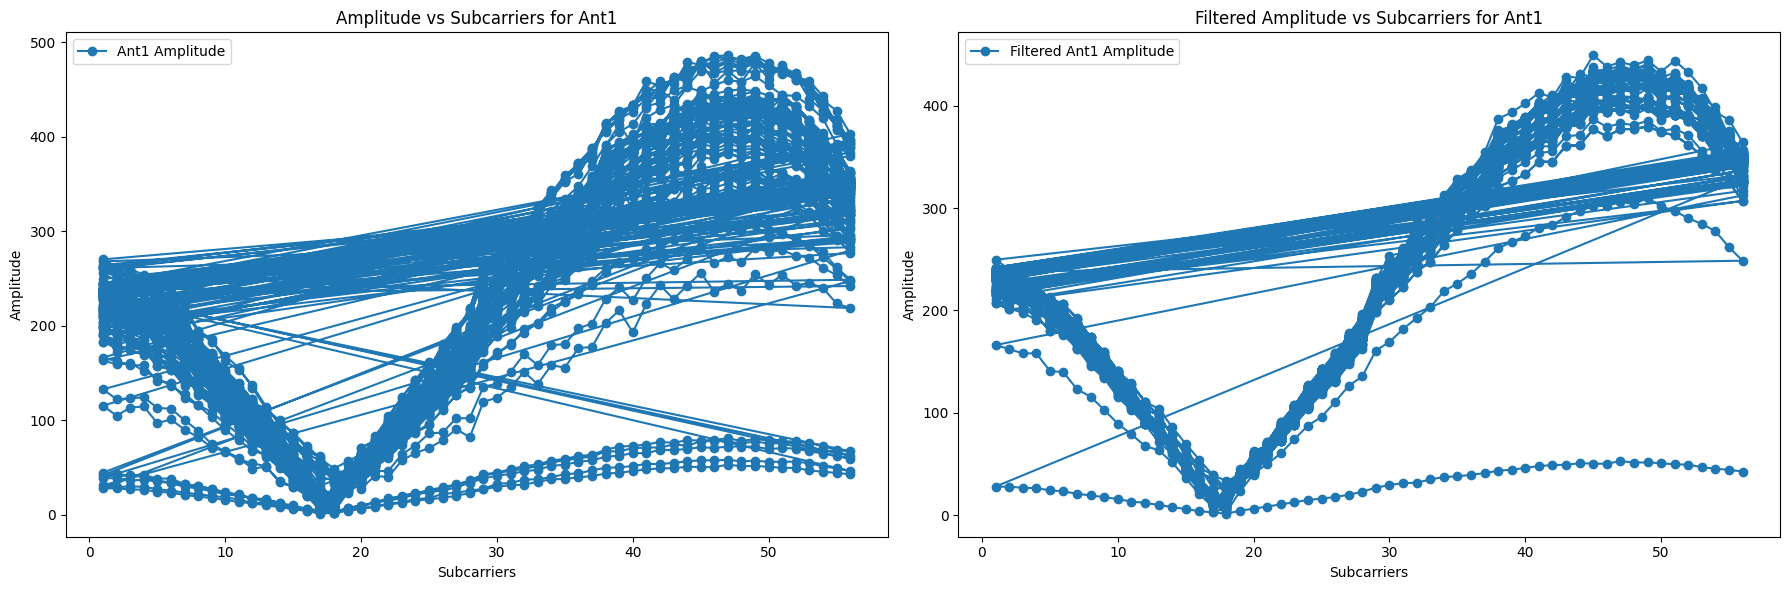

In [276]:
# fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# ax[0].plot(wo_1_1_0_nc_1["subcarriers"], wo_1_1_0_nc_1["ant1_amplitude"], label="Ant1 Amplitude", marker='o')
# ax[0].set_xlabel("Subcarriers")
# ax[0].set_ylabel("Amplitude")
# ax[0].set_title("Amplitude vs Subcarriers for Ant1")
# ax[0].legend()

# ax[1].plot(wo_1_1_0_nc_1_ant1["subcarriers"], wo_1_1_0_nc_1_ant1["filtered_ant1_amplitude"], label="Filtered Ant1 Amplitude", marker='o')
# ax[1].set_xlabel("Subcarriers")
# ax[1].set_ylabel("Amplitude")
# ax[1].set_title("Filtered Amplitude vs Subcarriers for Ant1")
# ax[1].legend()

# # Adjust layout and display the plots
# plt.tight_layout()
# plt.show()

In [277]:
wo_1_1_0_nc_1_ant1['filtered_sg_ant1_amplitude'] = savgol_filter(wo_1_1_0_nc_1_ant1['filtered_ant1_amplitude'], window_length=5, polyorder=2)


/tmp/ipykernel_42020/2777043842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wo_1_1_0_nc_1_ant1['filtered_sg_ant1_amplitude'] = savgol_filter(wo_1_1_0_nc_1_ant1['filtered_ant1_amplitude'], window_length=5, polyorder=2)


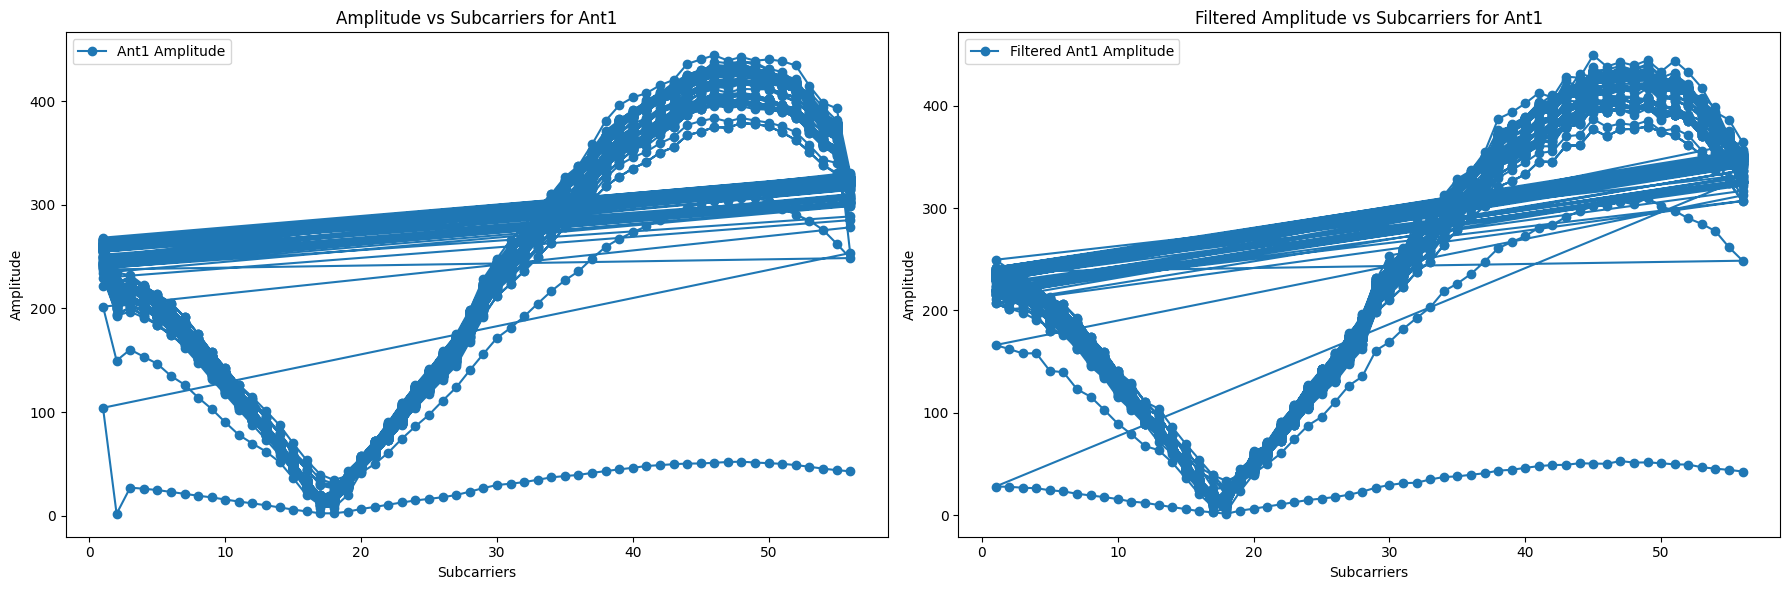

In [278]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

ax[0].plot(wo_1_1_0_nc_1_ant1["subcarriers"], wo_1_1_0_nc_1_ant1["filtered_sg_ant1_amplitude"], label="Ant1 Amplitude", marker='o')
ax[0].set_xlabel("Subcarriers")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("Amplitude vs Subcarriers for Ant1")
ax[0].legend()

ax[1].plot(wo_1_1_0_nc_1_ant1["subcarriers"], wo_1_1_0_nc_1_ant1["filtered_ant1_amplitude"], label="Filtered Ant1 Amplitude", marker='o')
ax[1].set_xlabel("Subcarriers")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("Filtered Amplitude vs Subcarriers for Ant1")
ax[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# HDBSCAN

In [ ]:
import hdbscan

In [ ]:
ant1_dbscan = hdbscan.HDBSCAN(min_samples=2*wo_1_1_0_nc_1_ant1.shape[1], core_dist_n_jobs=-1)
ant1_dbscan.fit(wo_1_1_0_nc_1_ant1)
wo_1_1_0_nc_1_ant1['ant1_amplitude_cluster'] = ant1_dbscan.labels_
wo_1_1_0_nc_1_ant1.drop(wo_1_1_0_nc_1_ant1[wo_1_1_0_nc_1_ant1.ant1_amplitude_cluster < 0].index, inplace=True)